# 无监督学习的类型
本文主要讨论两种类型的无监督学习：**数据变换与聚类**
数据集的**无监督变换（unsupervised transformation）**是创建数据新的表示的算法，与数据的原始表示相比，新的表示可能更容易被人或其他机器学习算法所理解。无监督变换的一个常见应用是降维（dimensionality reduction）,它接受包含许多特征的数据的高维表示，并找到表示该数据的一种新方法，用较少的特征就可以概括其重要特性。降维的一个常见应用是为了可视化将数据降为二维。  
无监督变换的另一种应用是找到“构成”数据的各个组成部分。这方面的一个例子就是对文本文档集合进行主题提取。这里的任务是找到每个文档中讨论的未知主题，并学习每个文档中出现了哪些主题。这可以用于追踪社交媒体上的话题讨论，比如选举、枪支管制或流行歌手等话题。  
与之相反，**聚类算法（clustering algorithm）**将数据划分成不同的组，每组包含相似的物项。

# 无监督学习的挑战
无监督学习的一个主要挑战就是评估算法是否学到了有用的东西。无监督学习算法一般用于不包含任何标签值得数据，所以我们不知道正确的输出应该是什么。因此很难判断一个模型是否“表现良好”。例如，假设我们的聚类算法已经将所有的侧脸照片和所有的正面照片进行分组。这肯定是人脸照片集合的一种可能的划分方法，但并不是我们想要的那种方法。然而，我们没有办法“告诉”算法我们要的是什么，通常来说，评估无监督算法结果的一种方法就是人工检查。  
因此，如果数据科学家想要更好地理解数据，那么无监督算法通常可以用于探索性的目的，而不是作为大型自动化系统的一部分。无监督算法的另一个常见应用是作为监督算法的预处理步骤。学习数据的一种新表示，有时可以提高监督算法的精度，或者作为减少内存占用和时间开销。    
在开始学习“真正的”无监督算法之前，我们先简要讨论几种简单又常用的预处理方法。

# 预处理与缩放
一些算法（如神经网络和SVM）对数据缩放非常敏感。因此，通常的做法是对特征进行调节，使数据表示更适合于这些算法。通常来说，这是对数据的一种简单的按特征的缩放和移动：

In [1]:
import sys
print("Python version:{}".format(sys.version))

import pandas as pd
print("pandas version:{}".format(pd.__version__))

import matplotlib
print("matplotlib version:{}".format(matplotlib.__version__))
import matplotlib.pyplot as plt

import numpy as np
print("Numpy version:{}".format(np.__version__))

import scipy as sp
print("Scipy version:{}".format(sp.__version__))

import IPython
print("IPython version:{}".format(IPython.__version__))

import sklearn
print("scikit-learn version:{}".format(sklearn.__version__))

import mglearn
import graphviz

Python version:3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
pandas version:0.23.4
matplotlib version:3.0.2
Numpy version:1.15.4
Scipy version:1.1.0
IPython version:7.2.0
scikit-learn version:0.20.1


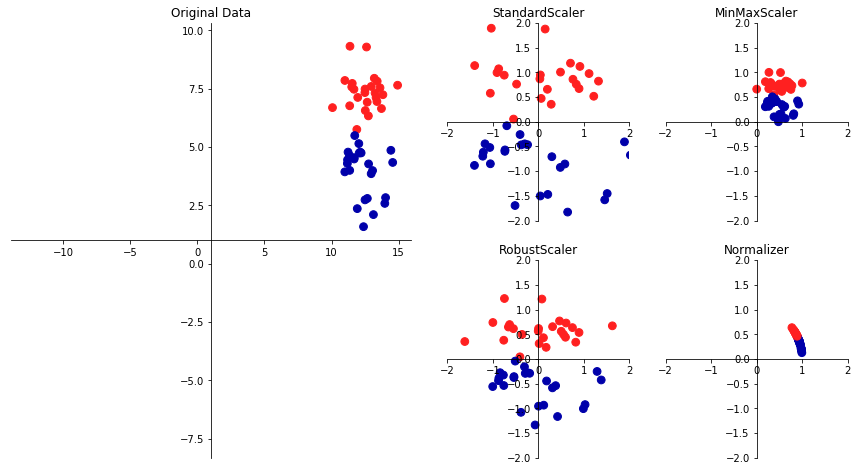

In [2]:
mglearn.plots.plot_scaling()

上图就是对数据集缩放和预处理的各种方法。第一张图显示的是一个模拟的有两个特征的二分类数据集。第一个特征（x轴）位于10到15之间。第二个特征（y轴）大约位于1到9之间。接下来的4张图展示了4种数据变换方法，都生成了更加标准的范围。scikit-learn中的StandardScaler确保每个特征的平均值为0、方差为1，使所有特征都位于同一量级。但这种缩放不能保证特征任何特定的最大值和最小值。RobustScaler的工作原理与StandardScaler类似，确保每个特征的统计属性都位于同一范围。但RobustScaler使用的是中位数和四分位数，而不是平均值和方差。这样RobustScaler会忽略与其他点有很大不同的数据点（比如测量误差）。这些与众不同的数据点也叫异常值（outlier），可能会给其他缩放方法造成麻烦。  
与之相反，MinMaxScaler移动数据，使所有特征都刚好位于0到1之间。对于二维数据集来说，所有的数据都包含在x轴0到1与y轴0到1组成的矩形中。  
最后,Normalizer用到一种完全不同的缩放方法。它对每个数据点进行缩放，使得特征向量的欧式长度等于1。换句话说，它将一个数据点投射到半径为1的圆上（对于更高维度的情况，是球面）。这意味着每个数据点的缩放比例都不相同（乘以其长度的倒数）。如果只有数据的方向（或角度）是重要的，而特征向量的长度无关紧要，那么通常会使用这种归一化。

# 应用数据变换
我们将核SVM（SVC）应用在cancer数据集上，需要使用MinMaxScaler来预处理数据。首先加载数据集并将其分为训练集和测试集：

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


我们首先导入实现预处理的类，然后将其实例化：

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

然后，使用fit方法拟合缩放器(scaler)，并将其应用于训练集。对于MinMaxScaler来说，fit方法计算训练集中每个特征的最大值和最小值：

In [5]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

为了应用刚刚学习的变换（即对训练数据进行实际缩放），我们使用缩放器的transform方法。在scikit-learn中，每当模型返回数据的一种新表示时，都可以使用transform方法：

In [6]:
# 变换数据
X_train_scaled=scaler.transform(X_train)
# 在缩放之前和之后分别打印数据集属性
print("transformed shape:{}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n{}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n{}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n{}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_train_scaled.max(axis=0)))

transformed shape:(426, 30)
per-feature minimum before scaling:
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


变换后的数据形状与原始数据相同，特征只是发生了移动和缩放。你可以看到，现在所有特征都位于0和1之间，这也符合我们的预期。  
为了将SVM应用到缩放后的数据上，还需要对测试集进行变换。这可以通过对X_test调用transform方法来完成：

In [7]:
# 对测试集数据进行变换
X_test_scaled=scaler.transform(X_test)
# 在缩放之后打印测试数据的属性
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


你可以发现，对测试集缩放后的最大值和最小值不是1和0，这或许有些出乎意料。有些特征甚至在0~1的范围之外！对此的解释是，MinMaxScaler（以及其他缩放器）总是对训练集和测试集应用完全相同的变换。也就是说，transform方法总是减去训练集的最小值，然后除以训练集的范围，而这两个值可能与测试集的最小值和范围并不相同。

# 对训练集和测试数据集进行相同的缩放
为了让监督模型能够在测试集上运行，对训练集和测试集应用完全相同的变换是很重要的。如果我们使用测试集的最大值和最小值，我们看下会发生什么：

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

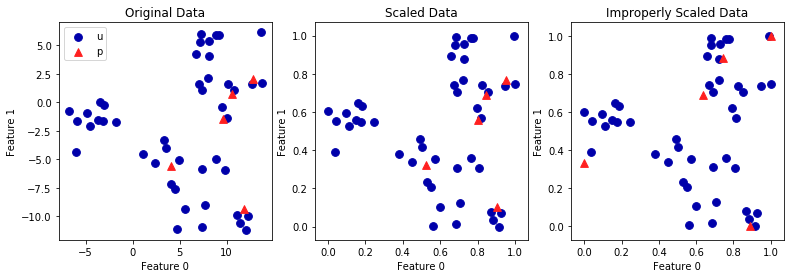

In [8]:
from sklearn.datasets import make_blobs

# 构造数据
X,_=make_blobs(n_samples=50,centers=5,random_state=4,cluster_std=2)
# 将其分为训练集和测试集
X_train,X_test=train_test_split(X,random_state=5,test_size=.1)

#绘制训练集和测试集
fig,axes=plt.subplots(1,3,figsize=(13,4))
axes[0].scatter(X_train[:,0],X_train[:,1],c=mglearn.cm2(0),label="Training set",s=60)
axes[0].scatter(X_test[:,0],X_test[:,1],marker='^',c=mglearn.cm2(1),label="Test set",s=60)
axes[0].legend("upper left")
axes[0].set_title("Original Data")

# 利用MinMaxScaler缩放数据
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# 将正确缩放的数据可视化
axes[1].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2(0),label="Training set",s=60)
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1],marker='^',c=mglearn.cm2(1),label="Test set",s=60)
axes[1].set_title("Scaled Data")

# 单独对数据集进行缩放
# 使得测试集的最小值为0，最大值为1
# 千万不要这么做！这里只是为了举例
test_scaler=MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaler_badly=test_scaler.transform(X_test)

# 将错误缩放的数据可视化
axes[2].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2(0),label="Training set",s=60)
axes[2].scatter(X_test_scaler_badly[:,0],X_test_scaler_badly[:,1],marker='^',c=mglearn.cm2(1),label="Test set",s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

第一张图示未缩放的二维数据集，其中训练集使用椭圆表示，测试集用三角形表示，第二张图中是同样的数据，但使用MinMaxScaler缩放。这里我们调用fit作用在训练集上，然后调用transformat作用在训练集和测试集上。你可以发现，第二张图中的数据集看起来与第一张图中的完全相同，只是坐标轴刻度发生了变化。现在所有特征都位于0和1之间。你还可以发现，测试数据（三角形）的特征最大值和最小值并不是1和0。  
第三张图展示了如果我们对训练集和测试集分别进行缩放会发生什么。在这种情况下，对训练集和测试集而言，特征的最大值和最小值都是1和0。但现在数据集看起来不一样。测试集相对训练集的移动不一致，因为它们分别做了不同的缩放。我们随意改变了数据的排列。这显然不是我们想要做的事情。  
再换一种思考方式，想象你的测试集只有一个点。对于一个点而言，无法将其正确地缩放以满足MinMaxScaler的最大值和最小值的要求。但是测试集的大小不应该对你的处理方式有影响。

# 预处理对监督学习的作用
现在回到cancer数据集，观察使用MinMaxScaler对学习SVC的作用。首先，为了对比，我们再次在原始数据上拟合SVC：

In [9]:
from sklearn.svm import SVC

X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
svm=SVC(C=100)
svm.fit(X_train,y_train)
print("Test set accuracy:{:.2f}".format(svm.score(X_test,y_test)))

Test set accuracy:0.63


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


下面先用MinMaxScaler对数据进行缩放，然后再拟合SVC:

In [10]:
# 使用0-1缩放进行预测
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# 在缩放后的训练数据上学习SVM
svm.fit(X_train_scaled,y_train)
# 在缩放后的数据集上计算分数
print("Scaled test set accuracy:{:.2f}".format(svm.score(X_test_scaled,y_test)))

Scaled test set accuracy:0.97


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


正如我们上面所见，数据缩放的作用非常显著。虽然数据缩放不涉及任何复杂的数学，但良好的做法仍然是使用scikit-learn提供的缩放机制，而不是自己重新实现它们，因为即使你在这些点的计算中也容易犯错。  
你也可以通过改变使用的类将一种预处理算法轻松替换成另一种，因为所有的预处理都具有相同的接口，都包含fit和transform方法：

In [11]:
# 利用零均值和单位方差的缩放方法进行预处理
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# 在缩放后的训练数据上学习SVM
svm.fit(X_train_scaled,y_train)
# 在缩放后的数据集上计算分数
print("SVM test set accuracy:{:.2f}".format(svm.score(X_test_scaled,y_test)))

SVM test set accuracy:0.96


# 降维、特征提取与流形学习
利用无监督学习进行数据变换可能有很多种目的。最常见的目的就是可视化、压缩数据，以及寻找信息量更大的数据表示以用于进一步的处理。  
为了实现这些目的，最简单也是最常用的一种算法就是主成分分析。我们也将学习另外两种算法：非负矩阵分解（NMF）和t-SNE,前者通常用于特征提取，后者通常用于二维散点图的可视化。  

## 主成分分析
主成分分析（principal component analysis,PCA）是一种旋转数据集的方法，旋转后的特征在统计上不相关。在做完这种旋转之后，通常是根据新特征对解释数据的重要性来选择它的一个子集。如下展示了对一个模拟二维数据集的作用：

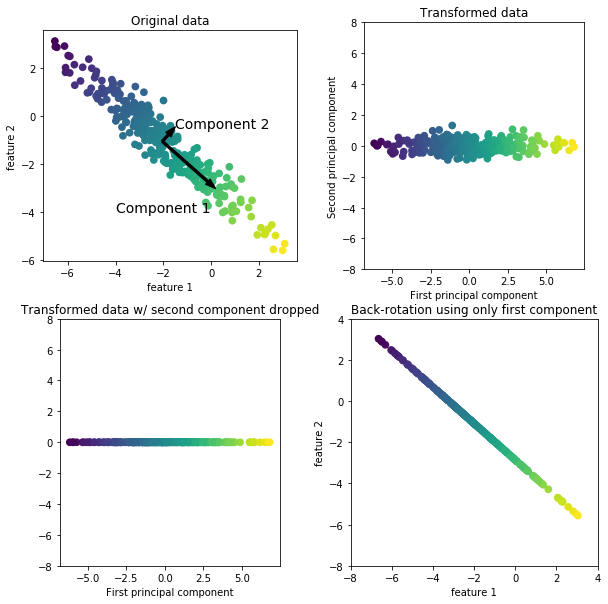

In [12]:
mglearn.plots.plot_pca_illustration()

第一张图（左上）显示的是原始数据点，用不同颜色加以区分。算法首先找到方差最大的方向，将其标记为“成分1”（Component 1）。这是数据中包含最多信息的方向（或向量），换句话说，沿着这个方向的特征之间最为相关。然后，算法找到与第一个方向正交（成直角）且包含最多信息的方向。在二维空间中，只有一个成直角的方向，但在更高维的空间中会有（无穷）多的正交方向。虽然这两个成分都画成箭头，但其头尾的位置并不重要。我们也可以将第一个成分画成从中心指向左上，而不是指向游侠。利用这一过程找到的方向称为主成分（principal component）,因为它们是数据方差的主要方向。一般来说，主成分的个数与原始特征相同。  
第二张图显示的是同样的数据，但现在将其旋转，使得第一主成分与x轴平行且第二主成分与y轴平行。在旋转之前，从数据中减去平均值，使得变换后的数据以零为中心。在PCA找到的旋转表示中，两个坐标轴是不相关的，也就是说，对于这种数据表示，除了对角线，相关矩阵全部为零。   
我们可以通过仅保留一部分主成分来使用PCA进行降维。在这个例子中，我们可以仅保留第一个主成分，正如第三张图所示（左下）。这将数据从二维数据降为一维数据集。但要注意，我们没有保留原始特征之一，而是找到了最有趣的分析（第一张图中从左上到右下）并保留这一方向，即第一主成分。  
最后，我们可以反向旋转并将平均值重新加到数据中。这样会得到上面最后一张图的数据。这些数据点位于原始特征空间中，但我们仅保留了第一主成分中包含的信息。这种变换有时用于去除数据中的噪声影响，或者将主成分中保留的那部分信息可视化。

## 将主成分应用于cancer数据集并可视化
PCA最常见的应用之一就是将高维数据集可视化。对于两个以上特征的数据，很难绘制散点图。对于Iris（鸢尾花）数据集，我们可以创建散点图矩阵，通过展示特征所有可能的两两组合来表示数据的局部图像。但如果我们想要查看乳腺癌数据集，即使用散点图矩阵也很困难。这个数据集包含30个特征，这就导致需要绘制30*14=420张散点图！我们永远不可能仔细观察所有这些图像，更不用说试图理解它们了。  
不过我们可以使用一种更简单的可视化方法———对每个特征分别计算两个类别（良性肿瘤和恶性肿瘤）的直方图：

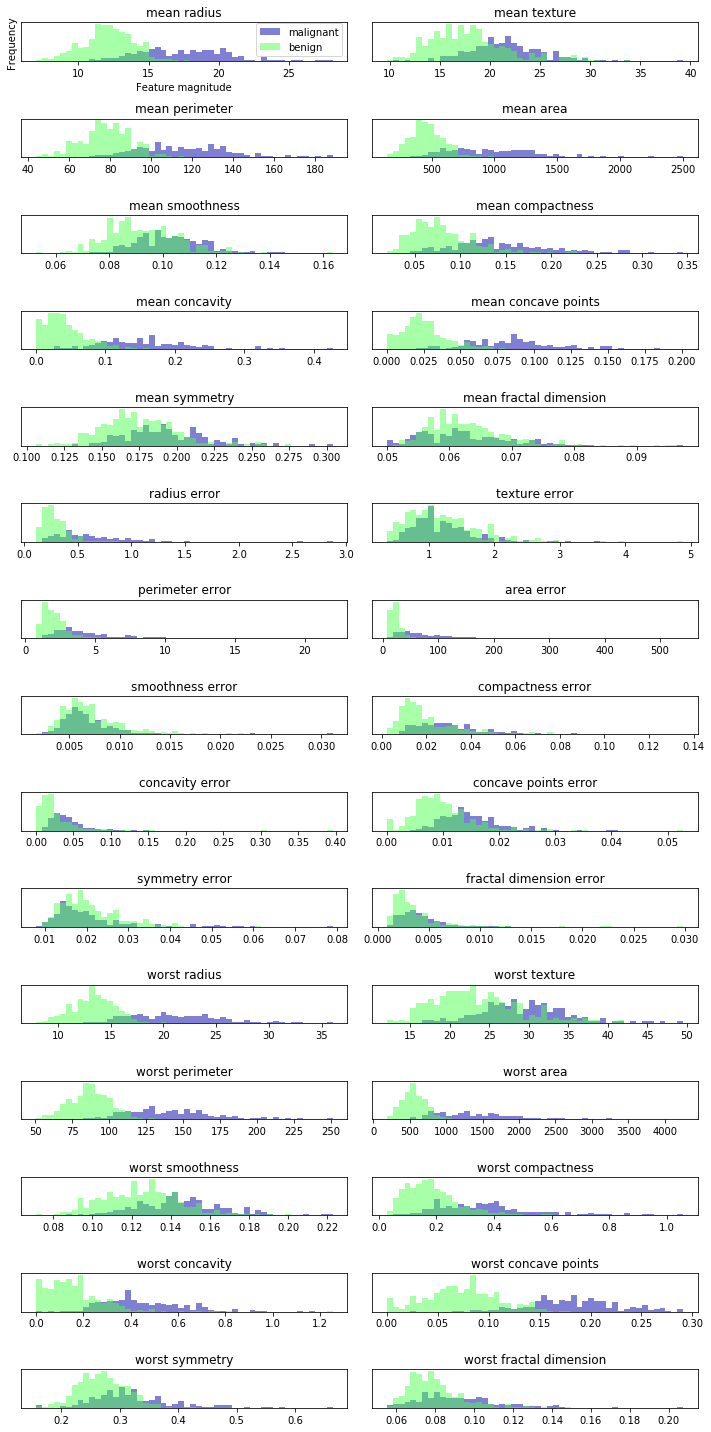

In [13]:
fig,axes=plt.subplots(15,2,figsize=(10,20))
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]

ax=axes.ravel()

for  i in range(30):
    _,bins=np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant","benign"],loc="best")
fig.tight_layout()

这里我们为每个特征创建一个直方图，计算具有某一特征的数据点在特定范围内（叫作bin）的出现概率。每张图都包含两个直方图，一个是良性类别的所有点（蓝色），一个是恶性类别的所有点（红色）。这样我们可以了解每个特征在两个类别中的分布情况，也可以猜测哪些特征能够更好地区分良性样本和恶性样本。例如，“smoothness error”特征似乎没有什么信息量，因为两个直方图大部分都重叠在一起，而“worst concave points”特征看起来信息量相当大，因为两个直方图的交集很小。  
但是，这种图无法向我们展示变量之间的相互作用以及这种相互作用与类别之间的关系。利用PCA,我们可以获取到主要的相互作用，并得到稍微完整的图像。我们可以找到前两个主成分，并在这个新的二维空间中利用散点图将数据可视化。  
在应用PCA之前，我们利用StandardScaler缩放数据，使每个特征的方差均为1：

In [14]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
scaler=StandardScaler()
scaler.fit(cancer.data)
X_scaled=scaler.transform(cancer.data)

学习并应用PCA变换与应用预处理变换一样简单。我们将PCA对象实例化，调用fit方法找到主成分，然后调用transform来旋转并降维。默认情况下，PCA仅旋转（并移动）数据，但保留所有的主成分。为了降低数据的维度，我们需要在创建PCA对象时指定想要保留的主成分个数：

In [15]:
from sklearn.decomposition import PCA

# 保留数据的前两个主成分
pca=PCA(n_components=2)
# 对乳腺癌数据拟合PCA模型
pca.fit(X_scaled)

# 将数据变换到前两个主成分的方向上
X_pca=pca.transform(X_scaled)
print("Original shape:{}".format(str(X_scaled.shape)))
print("Reduced shape:{}".format(str(X_pca.shape)))

Original shape:(569, 30)
Reduced shape:(569, 2)


现在我们可以对前两个主成分作图：

Text(0, 0.5, 'Second principal component')

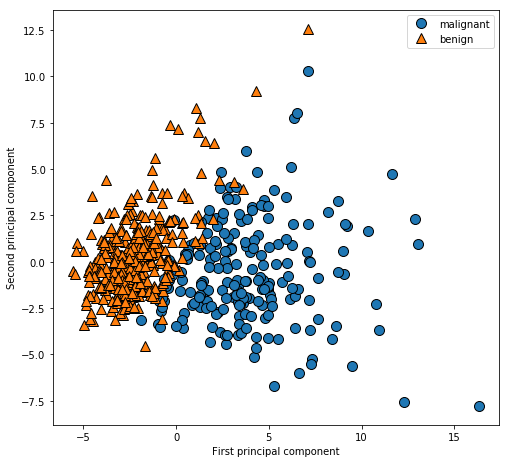

In [16]:
# 对第一个和第二个主成分作图，按类别着色
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(cancer.target_names,loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

重要的是要注意，PCA是一种无监督方法，，在寻找旋转方向时没有用到任何类别信息。它只是观察数据中的相关性。对于这里所示的散点图，我们绘制了第一主成分与第二主成分的关系，然后利用类别信息对数据点进行着色。你可以看到，在这个二维空间中两个类别被很好地分离。这让我们相信，即使是线性分类器（在这个空间中学习一条直线）也可以在区分这两个类别时表现得相当不错。我们还可以看到，恶性点比良性点更加分散，这一点也可以之前的直方图中看出来。  
PCA的一个缺点在于，通常不容易对图中的两个轴做出解释。主成分对应于原始数据中的方向，所以它们是原始特征的组合。但这些组合往往非常复杂，这一点我们很快就会看到。在拟合过程中，主成分被保留在PCA对象的components_属性中：

In [17]:
print("PCA component shape:{}".format(pca.components_.shape))

PCA component shape:(2, 30)


components_的每一行对应于一个主成分，它们按重要性（第一主成分排在首位，以此类推）。列对应于PCA的原始特征属性，在本例中即为“mean radius”“mean texture”等。我们来看一下components_的内容：

In [18]:
print("PCA component:\n{}".format(pca.components_))

PCA component:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


我们还可以用热图将系数可视化，这可能更容易理解：

Text(0, 0.5, 'Principal components')

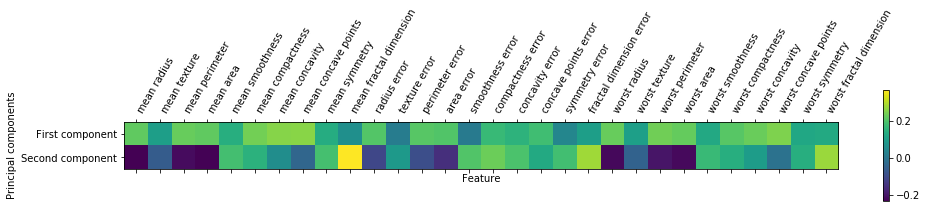

In [19]:
plt.matshow(pca.components_,cmap="viridis")
plt.yticks([0,1],["First component","Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=60,ha="left")
plt.xlabel("Feature")
plt.ylabel("Principal components")

你可以看到，在第一个主成分中，所有特征的符号相同（均为正，但前面我们提到过，箭头指向哪个方向无关紧要）。这意味着在所有特征之间存在普遍的相关性。如果一个测量值较大的话，其他的测量值可能也较大。第二个主成分的符号有正有负，而且两个主成分都包含所有30个特征。这种所有特征的混合使得解释上图中的坐标轴变的十分困难。

## 特征提取的特征脸
PCA的另一个应用是特征提取。特征提取背后的思想是，可以找到一种数据表示，比给定的原始表示更适合于分析。特征提取很有用，它的一个很好的应用实例就是图像。图像由像素组成，通常存储为红绿蓝（RGB）强度。图像中的对象通常由上千个像素组成，它们只有放在一起才有意义。  
我们将给出用PCA对图像做特征提取的一个简单应用，即处理Wild数据集Labeled Faces（标记人脸）中的人脸图像。这一数据集包含从互联网下载的名人脸部图像，它包含从21世纪初开始的政治家、歌手、演员和运动员的人脸图像。我们使用这些图像的灰度版本，并将它们按比例缩小以加快处理速度：

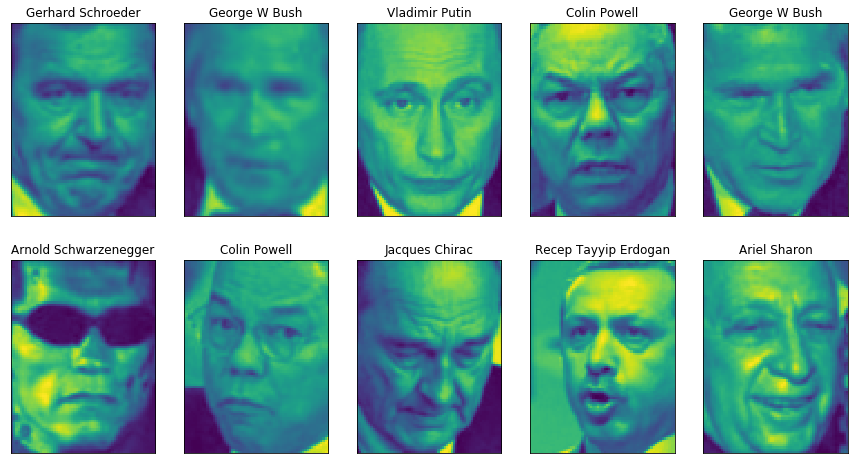

In [20]:
from sklearn.datasets import fetch_lfw_people

people=fetch_lfw_people(min_faces_per_person=25,resize=0.7)
image_shape=people.images[0].shape

fix,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})

for target,image,ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

一共有2588张图像，每张大小为87像素*65像素，分别属于62个不同的人：

In [21]:
print("people.images.shape:{}".format(people.images.shape))
print("Number of classes:{}".format(people.target_names))

people.images.shape:(2588, 87, 65)
Number of classes:['Alejandro Toledo' 'Alvaro Uribe' 'Andre Agassi' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Bill Clinton' 'Colin Powell' 'David Beckham'
 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Gloria Macapagal Arroyo' 'Gray Davis' 'Guillermo Coria' 'Hans Blix'
 'Hugo Chavez' 'Jack Straw' 'Jacques Chirac' 'Jean Chretien'
 'Jennifer Capriati' 'John Ashcroft' 'John Negroponte'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva' 'Mahmoud Abbas'
 'Megawati Sukarnoputri' 'Nestor Kirchner' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rudolph Giuliani' 'Serena Williams'
 'Silvio Berlusconi' 'Tom Daschle' 'Tom Ridge' 'Tony Blair' 'Vicente Fox'
 'Vladimir Putin']


但这个数据有些倾斜，其中包含George W.Bush（小布什）和Coin Powell(科林.鲍威尔）的大量图像，正如你在下面所见：

In [22]:
# 计算每个目标出现的次数
counts=np.bincount(people.target)
# 将次数与目标名称一起打印出来
for i,(count,name) in enumerate(zip(counts,people.target_names)):
    print("{0:25} {1:3}".format(name,count),end=' ')
    if (i+1)%3==0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Andre Agassi               36 
Ariel Sharon               77 Arnold Schwarzenegger      42 Bill Clinton               29 
Colin Powell              236 David Beckham              31 Donald Rumsfeld           121 
George W Bush             530 Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 
Gray Davis                 26 Guillermo Coria            30 Hans Blix                  39 
Hugo Chavez                71 Jack Straw                 28 Jacques Chirac             52 
Jean Chretien              55 Jennifer Capriati          42 John Ashcroft              53 
John Negroponte            31 Juan Carlos Ferrero        28 Junichiro Koizumi          60 
Kofi Annan                 32 Laura Bush                 41 Lleyton Hewitt             41 
Luiz Inacio Lula da Silva  48 Mahmoud Abbas              29 Megawati Sukarnoputri      33 
Nestor Kirchner            37 Recep Tayyip Erdogan       30 Ricardo Lagos              27 

为了降低数据倾斜，我们对每个人最多只取50张图像（否则，特征提取将会被George W.Bush的可能性大大影响）：

In [23]:
mask=np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1
    
X_people=people.data[mask]
y_people=people.target[mask]

# 将灰度值缩放到0和1之间，而不是在0和255之间
# 以得到更好的数据稳定性
X_people=X_people/255

人脸识别的一个常见任务就是某个前所未见的人脸是否属于数据库中的某个已知人物。  
这在照片收集、社交媒体和安全应用中都有应用。解决这个问题的方法之一就是构建一个分类器，每个人都是一个单独的类别。但人脸数据库中通常由许多不同的人，而同一个人的图像很少（也就是说，每个类别的训练样例很少）。这使得大多数分类器的训练都很困难。另外，通常你还想要能够轻松添加新的人物，不需要重新训练一个大型模型。

一种简单的解决办法是使用单一最近邻分类器，寻找与你要分类的人脸最为相似的人脸。这个分类器原则上可以处理每个类别只有一个训练样例的情况。下面看一下KNeighborsClassifier的表现如何：

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# 将数据分为训练集和测试集
X_train,X_test,y_train,y_test=train_test_split(X_people,y_people,stratify=y_people,random_state=0)
# 使用一个邻居构建KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print("Test set score of 1-nn:{:.2f}".format(knn.score(X_test,y_test)))

Test set score of 1-nn:0.27


我们得到的精度为27%。对于包含62个类别的分类问题来说，这实际上不算太差（随机猜测的精度约为1/62=1.5%），但也不算好。我们每识别四次仅正确识别了一个人。  
这里就可以用到PCA。想要度量人脸的相似度 ，计算原始像素空间中的距离是一种相当糟糕的方法。用像素表示来比较两张图像时，我们比较的是每个像素的灰度值与另一张图像对应位置的像素灰度值。这种表示与人们对人脸图像的解释方式有很大不同，使用这种原始表示很难获取面部特征。例如，如果使用像素距离，那么将人类向右移动一个像素将会发生巨大的变化，得到一个完全不同的表示。我们希望，使用沿着主成分方向的距离可以提高精度。这里我们启用PCA的白化（whitening）选项，它将主成分缩放到相同的尺度。变换后的结果与使用StandardScaler相同。再次使用之前图的数据，白化不仅对应于旋转数据，还对应于缩放数据使其形状是圆形而不是椭圆：

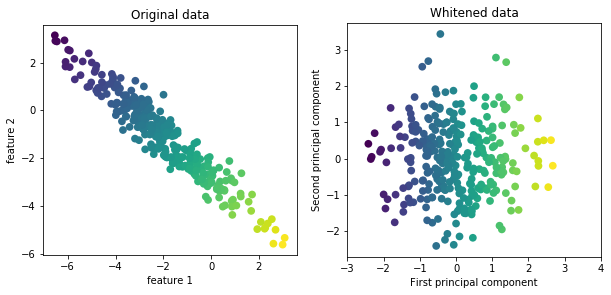

In [25]:
mglearn.plots.plot_pca_whitening()

我们对训练数据拟合PCA对象，并提取前100个主成分。然后对训练数据和测试数据进行变换：

In [26]:
pca=PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

print("X_train_pca.shape:{}".format(X_train_pca.shape))

X_train_pca.shape:(1221, 100)


新数据有100个特征，即前100个主成分。现在，可以对新表示使用单一最近邻分类器来讲我们的图像分类：

In [27]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print("Test set score of 1-nn:{:.2f}".format(knn.score(X_test_pca,y_test)))

Test set score of 1-nn:0.37


我们的精度有了相当显著的提高，从27%提升到37%，这证实了我们的直觉，即主成分可能提供了一种更好的数据表示。  
对于图像数据，我们还可以很容易地将找到的主成分可视化。请记住，成分对于输入空间里的方向。这里的输入空间是87像素 * 65像素的灰度图像，所以在这个空间中的方向也是87像素 * 65像素的灰度图像。  
我们来看一下前几个主成分：

In [28]:
print("pca.components_.shape:{}".format(pca.components_.shape))

pca.components_.shape:(100, 5655)


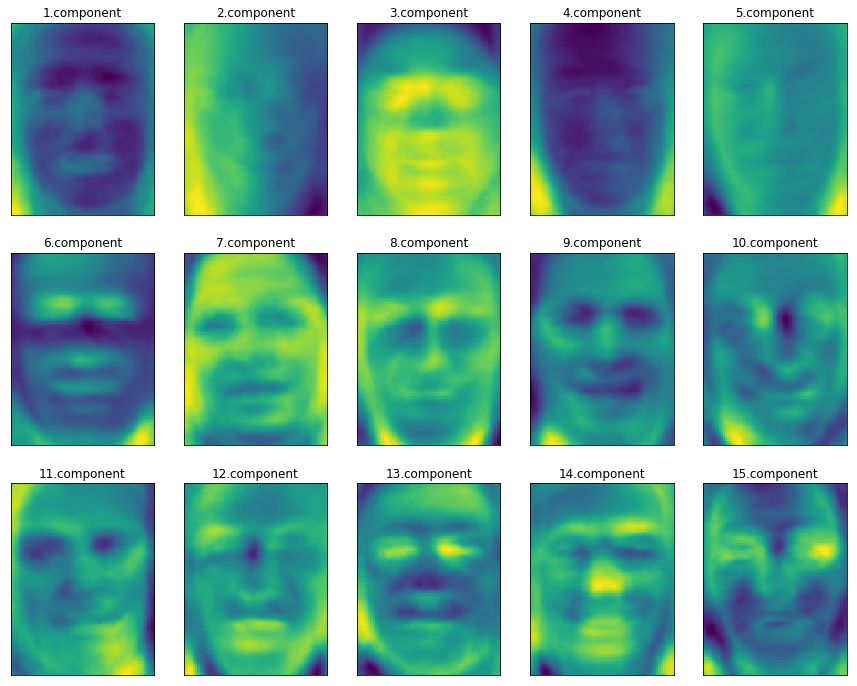

In [29]:
fix,axes=plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})
for i,(component,ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("{}.component".format((i+1)))

虽然我们肯定无法理解这些成分的所有内容，但可以猜测一些主成分捕捉到了人脸图像的哪些方面。第一个主成分似乎主要编码的是人脸与背景的对比，第二个主成分编码的是人左半部分和右半部分的明暗程度差异，如此等等。虽然这种表示比原始像素值的语义稍强，但它仍与人们感知人脸的方式相去甚远。由于PCA模型是基于像素的，因此人脸的相对位置（眼睛、下巴和鼻子的位置）和明暗程度都对两张图像在像素表示中的相似程度有很大影响。但人脸的相对位置和明暗程度可能并不是人们首先感知的内容。在要求人们评价人脸的相似度时，他们更可能会使用年龄、性别、面部表情和发型等属性，而这些属性很难从像素强度中推断出来。重要的是要记住，算法对数据（特别是视觉数据，比如人们非常熟悉的图像）的解释通常与人类的解释方式大不相同。

# 非负矩阵分解
非负矩阵分解（non-negative matrix factorization,NMF）是另一种无监督学习算法，其目的在于提取有用的特征。它的工作原理类似于PCA，也可以用于降维。与PCA相同，我们试图将每个数据点写成一些分量的加权求和。但在PCA中，我们想要的是正交分量，并且能够解释尽可能多的数据方差；而在NMF中，我们希望分量和系数均为非负，也就是说，我们希望分量和系数都大于或等于0。因此，这种方法只能应用于每个特征都是非负的数据，因为非负分量的非负求和不可能变为负值。  
将数据分解成非负加权求和的这个过程，对由多个独立源相加（或叠加）创建而成的数据特别有用，比如多人说话的音轨或包含多种乐器的音乐。在这种情况下，NMF可以识别出组合成数据的原始分量。总的来说，与PCA相比，NMF得到的分量更容易解释，因为负的分量和系数可能会导致难以解释的抵消效应（cancellation effect）。  
在将NMF应用于人脸数据集之前，我们先来简要回顾一下模拟数据：

## 将NMF应用于模拟数据
与使用PCA不同，我们需要保证数据是正的，NMF能够对数据进行操作。这说明数据相对于原点(0,0)的位置实际上对NMF很重要。因此，你可以将提取出来的非负分量看作是从（0,0）到数据的方向。  
下面给出NMF对二维玩具数据上的结果：

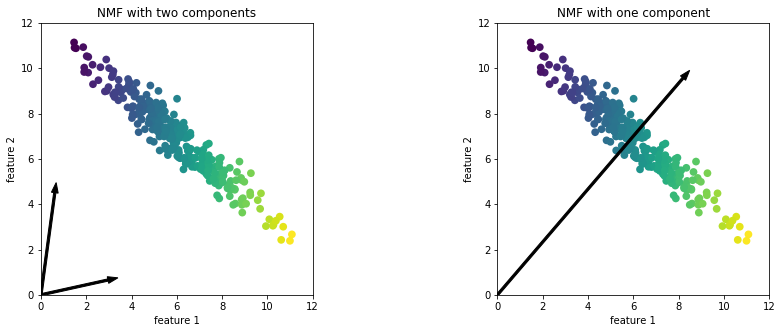

In [30]:
mglearn.plots.plot_nmf_illustration()

对于两个分量的NMF（如上左图所示），显然所有数据点都可以写成两个分量的正数组合。如果有足够多的分量能够完美地重建数据（分量个数与特征个数相同），那么算法会选择指向数据极值的方向。  
如果我们仅使用一个分量，那么NMF会创建一个指向平均值的分量，因为指向这里可以对数据做出最好的解释。你可以看到，与PCA不同，减少分量个数不仅会删除一些方向，而且会创建一组完全不同的分量！NMF的分量也没有按任何特定方法排序，所以不存在“第一非负分量”：所有分量的地位平等。  
NMF使用了随机初始化，根据随机种子的不同可能会产生不同的结果。在相对简单的情况下（比如两个分量的模拟数据），所有数据都可以被完美地解释，那么随机性的影响很小（虽然可能会影响分量的顺序或尺度）。在更加复杂的情况下，影响可能会很大。

## 将NMF应用于人脸图像
现在我们将NMF应用于之前用过的Wild数据集中的Labeled Faces。NMF的主要参数是我们想要提取的分量个数。通常来说，这个数字要小于输入特征的个数（否则的话，将每个像素作为单独的分量就可以对数据进行解释）。  
首先，我们来观察分量个数如何影响NMF重建数据的好坏：

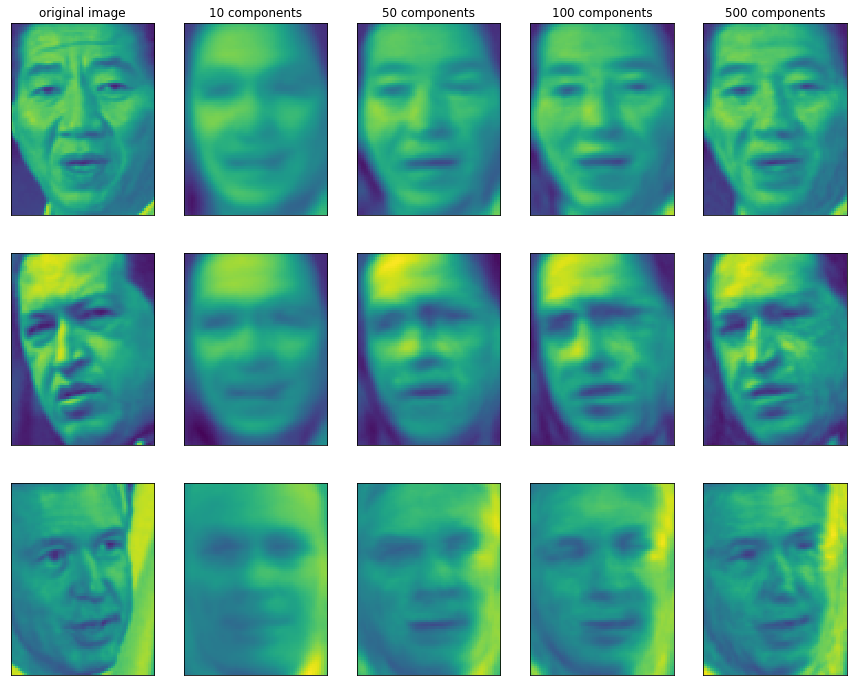

In [31]:
mglearn.plots.plot_nmf_faces(X_train,X_test,image_shape)

反向变换的数据质量与使用PCA时类似，但要稍差一些。这是符合预期的，因为PCA找到的是重建的最佳方向。NMF通常并不用于对数据进行重建或编码，而是用于在数据中寻找有趣的模式。  
我们尝试仅提取一部分分量（比如15个），初步观察一下数据：

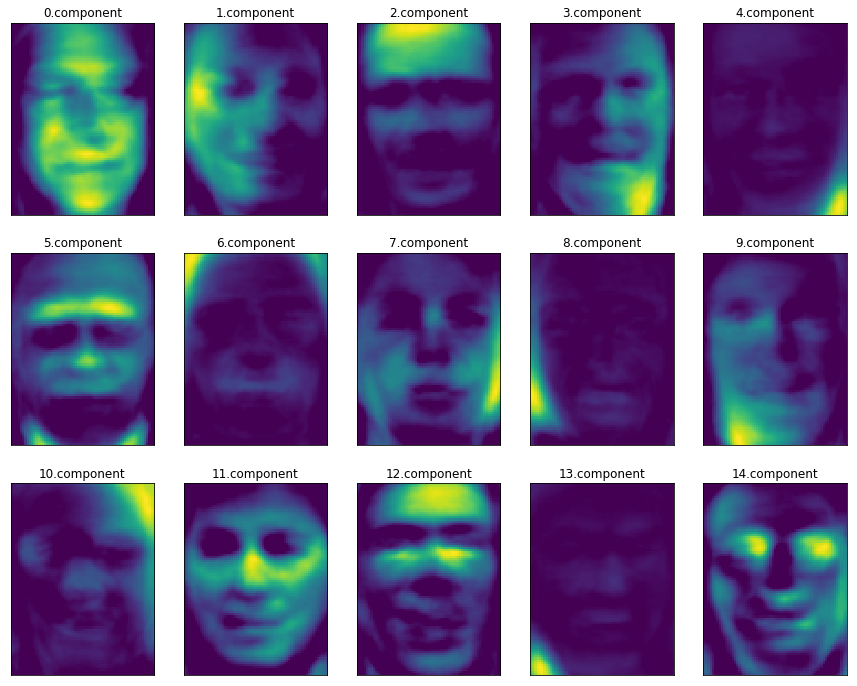

In [32]:
from sklearn.decomposition import NMF

nmf=NMF(n_components=15,random_state=0)
nmf.fit(X_train)
X_train_nmf=nmf.transform(X_train)
X_test_nmf=nmf.transform(X_test)

fix,axes=plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})
for i,(component,ax) in enumerate(zip(nmf.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}.component".format(i))

这些分量都是正的，因此比之前的PCA分量效果更像人脸原型。例如，你可以清楚地看到，分量3（component3）显示了稍微向右转动的人脸，而分量7（component 7）则显示了稍微向左转动的人脸。我们来看一下这两个分量特别大的那些图像：

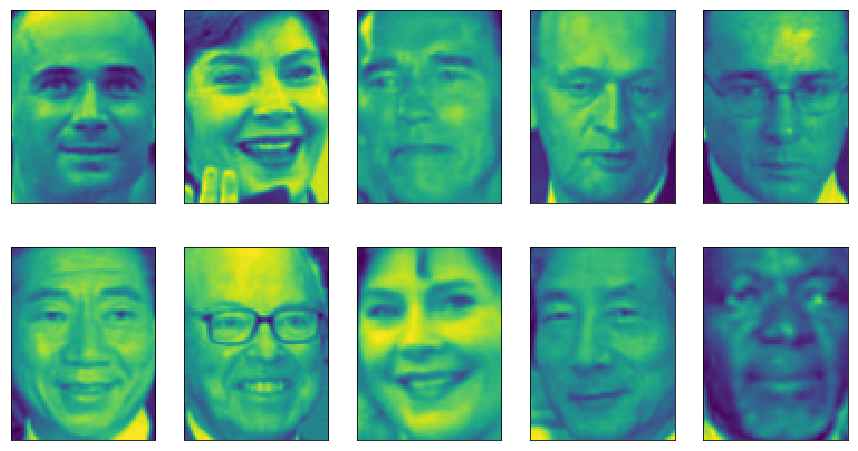

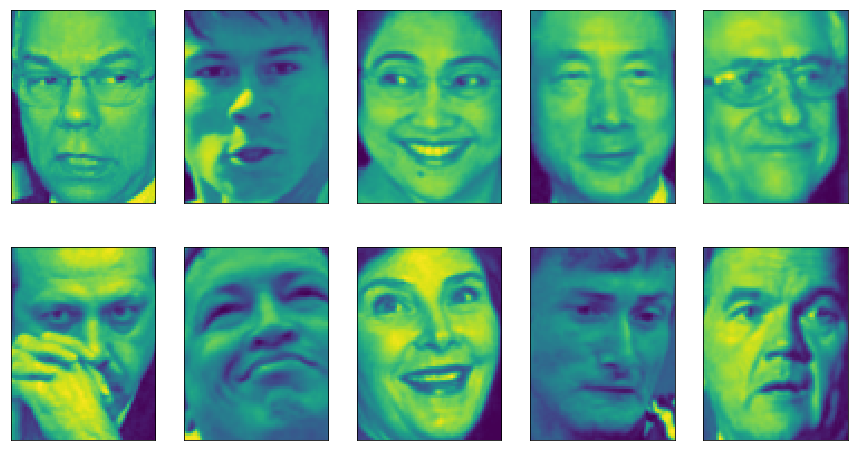

In [33]:
compn=3
# 按第3个分量排序，绘制前10张图像

inds=np.argsort(X_train_nmf[:,compn][::-1])
fig,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})  
for i,(ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
  
compn=7
# 按第7个分量排序，绘制前10张图像
inds=np.argsort(X_train_nmf[:,compn][::-1])
fig,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})

for i,(ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape)) 

正如所料，分量3系数较大的人脸都是向右看的人脸，而分量7系数较大的人脸都向左看。如前所述，提取这样的模式最适合于具有叠加结构的数据，包括音频、基因表达和文本数据。我们通过一个模拟数据的例子来看一下这种用法。  
假设我们对一个信号感兴趣，它是三个不同信号源合成的：

Text(0, 0.5, 'Signal')

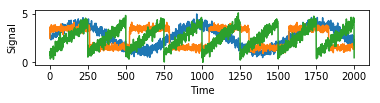

In [34]:
S=mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'-')
plt.xlabel("Time")
plt.ylabel("Signal")

不幸的是，我们无法观测到原始信号，只能观测到三个信号的叠加混合。我们想要将混合信号分解为原始分量。假设我们有许多不同的方法来观测混合信号（比如有100台测量装置），每种方法都为我们提供了一系列测量结果：

In [35]:
# 将数据混合成100维的状态
A=np.random.RandomState(0).uniform(size=(100,3))
X=np.dot(S,A.T)
print("Shape of measurements:{}".format(X.shape))

Shape of measurements:(2000, 100)


我们可以用NMF来还原这三个信号：

In [36]:
nmf=NMF(n_components=3,random_state=42)
S_=nmf.fit_transform(X)
print("Recovered signal shape:{}".format(S_.shape))

Recovered signal shape:(2000, 3)


为了对比，我们也应用了PCA:

In [37]:
pca=PCA(n_components=3)
H=pca.fit_transform(X)

下面使用NMF和PCA发现信号：

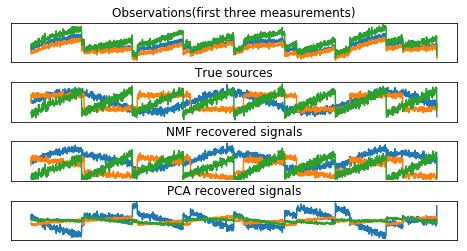

In [38]:
models=[X,S,S_,H]
names=['Observations(first three measurements)','True sources','NMF recovered signals','PCA recovered signals']
fig,axes=plt.subplots(4,figsize=(8,4),gridspec_kw={'hspace':0.5},subplot_kw={'xticks':(),'yticks':()})

for model,name,ax in zip(models,names,axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')

图片中包含来自X的100次测量中的3次，用于参考。可以看到，NMF在发现原始信号源时得到了不错的结果，而PCA则失败了，仅使用第一个成分来解释数据中
的大部分变化。要记住，NMF生成的分量是没有顺序的。在这个例子中，NMF分量的顺序与原始信号完全相同（参见三条曲线的颜色），但这纯属偶然。

# 用t-SNE进行流形学习
虽然PCA通常是用于变换数据的首选方法，使你能够用散点图将其可视化，但这一切方法的性质（先旋转然后减少方向）限制其有效性，正如我们在Wild数据集Labeled Faces的散点图中所看到的那样。有一类用于可视化的算法叫作流形学习算法（manifold learning algorithm）,它允许进行更复杂的映射，通常也可以给出更好的可视化。其中特别有用的一个是t-SNE算法。  
流形学习算法主要用于可视化，因此很少用来生成两个以上的新特征。其中一些算法（包括t-SNE）计算训练数据的一种新表示，但不允许变换新数据。 流形学习对探索性数据分析是很有用的，但如果最终目标是监督学习的话，则很少使用。t-SNE背后的思想是找到数据的一个二维表示，尽可能地保持数据点之间的距离。t-SNE首先给出每个数据点的随机二维表示，然后尝试让在原始特征空间中距离较近的点更加靠近，原始特征空间中相距较远的点更加远离。t-SNE重点关注距离较近的点，而不是保持距离较远的点之间的距离。换句话说，它试图保存那些表示哪些点比较靠近的信息。  

我们将对scikit-learn包含的一个手写数字数据集应用t-SNE流形学习算法。在这个数据集中，每个数据点都是0到9之间手写数字的一张8 * 8 灰度图像：

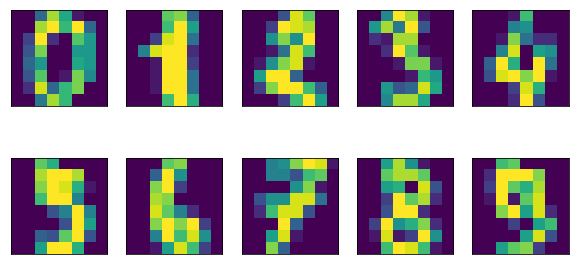

In [39]:
from sklearn.datasets import load_digits

digits=load_digits()
fig,axes=plt.subplots(2,5,figsize=(10,5),subplot_kw={'xticks':(),'yticks':()})

for ax,img in zip(axes.ravel(),digits.images):
    ax.imshow(img)

我们用PCA将降到二维的数据可视化。我们对前两个主成分作图，并按类别对数据点着色：

Text(0, 0.5, 'Second principal component')

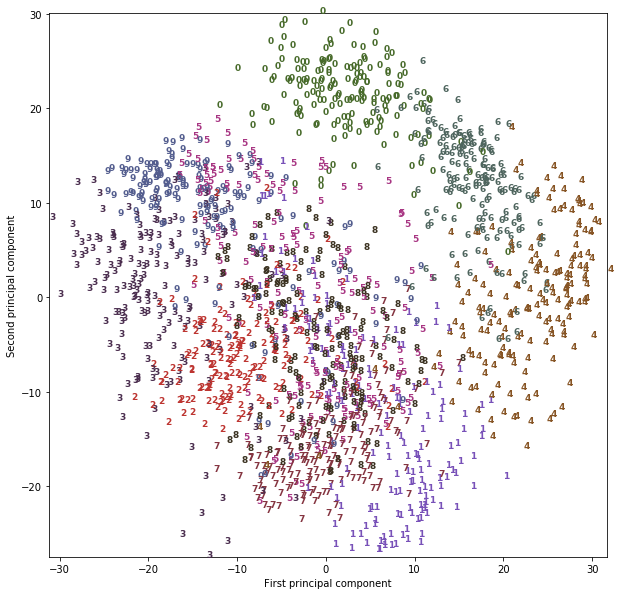

In [40]:
# 构建一个PCA原型
pca=PCA(n_components=2)
pca.fit(digits.data)
# 将digits数据变换到前两个主成分的方向上
digits_pca=pca.transform(digits.data)
colors=['#476A2A','#7851B8','#BD3430','#4A2D4E','#875525','#A83683','#4E655E','#853541','#3A3120','#535D8E']
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(),digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(),digits_pca[:,1].max())
for i in range(len(digits.data)):
    # 将数据实际绘制成文本，而不是散点
    plt.text(digits_pca[i,0],digits_pca[i,1],str(digits.target[i]),color=colors[digits.target[i]],fontdict={'weight':'bold','size':9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

实际上，这里我们用每个类别对应的数字作为符号来显示每个类别的位置。利用前两个主成分可以将数字0、6和4比较好地分开，尽管仍有重叠。大部分其他数字都大量重叠在一起。  
我们将t-SNE应用于同一数据集，并对结果进行比较。由于t-SNE不支持变换新数据，所以TSNE类没有transform方法。我们可以调用fit_transform方法来代替，它会构建模型并立刻返回变换后的数据：

In [41]:
from sklearn.manifold import TSNE

tsne=TSNE(random_state=42)
# 使用fit_transform而不是fit，因为TSNE没有transform方法
digits_tsne=tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE feature 1')

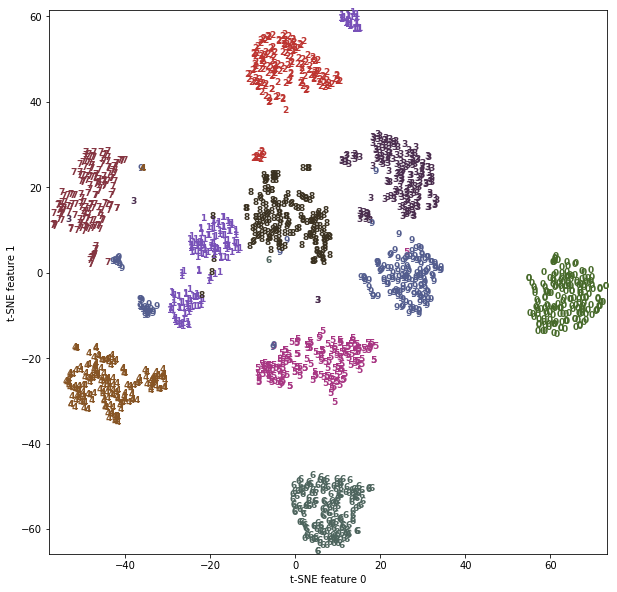

In [42]:
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(),digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(),digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    # 将数据实际绘制成文本，而不是散点
    plt.text(digits_tsne[i,0],digits_tsne[i,1],str(digits.target[i]),color=colors[digits.target[i]],fontdict={'weight':'bold','size':9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

t-SNE的结果非常棒。所有类别都被明确分开。数字1和9被分成几块，但大多数类别都形成一个密集的组。要记住，这种方法并不知道类别标签：它完全是无监督的。但它能够找到数据的一种二维表示，仅根据原始空间中数据点之间的靠近程度就能够将各个类别明确分开。  
t-SNE算法有一些调节参数，虽然默认参数的效果通常就很好。我们可以尝试修改perplexity和early_exaggeration,但作用一般很小。

# 聚类
**聚类（clustering）**是将数据集划分成组的任务，这些组叫作簇（cluster），其目标是划分数据，使得一个簇内的数据点发车相似且不同簇内的数据点非常不同。与分类算法类似，聚类算法为每个数据点分配（或预测）一个数字，表示这个点属于哪个簇。

## k均值聚类
k均值聚类是最简单也最常用的聚类算法之一。它试图找到代表数据特定区域的簇中心（cluster center）。算法交替执行以下两个步骤：将每个数据点分配给最近的簇中心，然后将每个簇中心设置为所分配的所有数据点的平均值。如果簇的分配不再发生变化，那么算法结束。  
下面在一个模拟数据集上对这一算法进行说明：

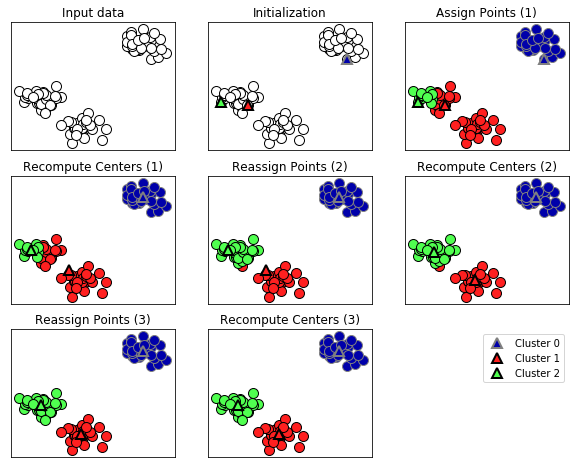

In [43]:
mglearn.plots.plot_kmeans_algorithm()

簇中心用三角形表示，而数据点用圆形表示。颜色表示簇成员。我们指定要寻找三个簇，所以通过声明三个随机数据点为簇中心来将算法初始化。然后开始迭代算法。首先，每个数据点被分配给距离最近的簇中心。接下来，将簇中心修改为所分配点的平均值。然后将这一个过程再重复两次。在第三次迭代之后，为簇中心分配的数据点保持不变，因此算法结束。  
给定新的数据点，k均值hi将其分配给最近的簇中心。下面展示学到的簇中心边界：

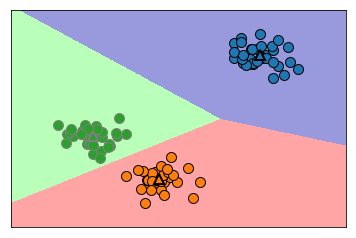

In [44]:
mglearn.plots.plot_kmeans_boundaries()

用sickit-learn应用k均值相当简单。下面我们将其应用于上图中的模拟数据。我们将KMeans类实例化，并设置我们要寻找的簇个数。然后对数据调用fit方法：

In [45]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 生成模拟的二维数据
X,y=make_blobs(random_state=1)

# 构建聚类模型
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

算法运行期间，为X中的每个训练数据点分配一个簇标签。你可以在kmeans.lables_属性中找到这些标签：

In [46]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


因为我们要找的是3个簇，所以簇的编号是0到2。  
你也可以用predict方法为新数据点分配簇标签。预测时会将最近的簇中心分配给每个新数据点，但现有模型不会改变。对训练集运行predict会返回与labels_相同的结果：

In [47]:
print(kmeans.predict(X))

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


可以看到，聚类算法与分类算法有些相似，每个元素都有一个标签。但不存在真实的标签，因此标签本身并没有先验意义。我们回到之前讨论过的人脸图像聚类的例子。聚类的结果可能是，算法找到的第3个簇仅包含你朋友Bela的面孔。但只有在查看图片之后才能知道这一点，而且数字3是任意的。算法给你的唯一信息就是所有标签为3的人脸都是相似的。  
对于我们刚刚在二维玩具数据集上运行的聚类算法，这意味着我们不应该为其中一组的标签是0、另一组的标签是1这一事实赋予任何意义。再次运行该算法可能会得到不同的簇编号，原因在于初始化的随机性质。  
我们可以查看刚才模拟数据集的标签。簇中心被保存在cluster_centers_属性中，我们用三角形表示它们：

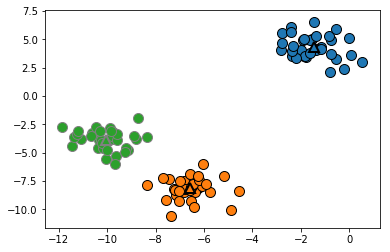

In [48]:
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2],markers='^',markeredgewidth=2)

我们也可以使用更多或更少的簇中心：

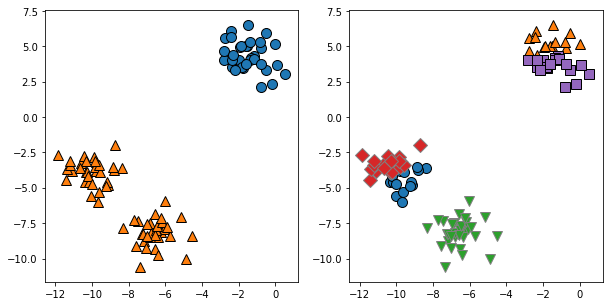

In [49]:
fig,axes=plt.subplots(1,2,figsize=(10,5))

# 使用2个簇中心 
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
assignments=kmeans.labels_

mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[0])

# 使用5个簇中心
kmeans=KMeans(n_clusters=5)
kmeans.fit(X)
assignments=kmeans.labels_

mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[1])

## k均值的失败案例
即使你知道给定数据集中簇的“正确”个数，k均值可能也不是总能找到它们。每个簇仅由其中心定义，这意味着每个簇都是凸形（convex）。因此，k均值只能找到相对简单的形状。k均值还假设所有簇在某种程度上具有相同的“直径”，它总是将簇之间的边界刚好画在簇中心的中间位置。有时这会导致令人惊讶的结果：

Text(0, 0.5, 'Feature 1')

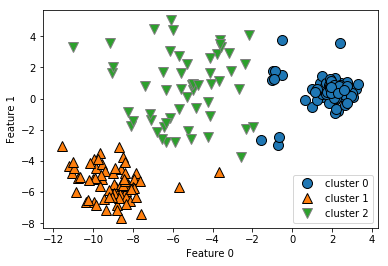

In [50]:
X_varied,y_varied=make_blobs(n_samples=200,cluster_std=[1.0,2.5,0.5],random_state=170)

y_pred=KMeans(n_clusters=3,random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:,0],X_varied[:,1],y_pred)
plt.legend(["cluster 0","cluster 1","cluster 2"],loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

你可能认为，左下方的密集区是第一个簇，右上方的密集区是第二个，中间密度较小的区域是第三个。但事实上，簇0和簇1都包含一些远离簇中其他点的点。

k均值还假设所有方向对每个簇同等重要。如下显示了一个二维数据集，数据中包含明确分开的三部分。但是这三部分被沿着对角线方向拉长。由于k均值仅考虑到最近簇中心的距离，所以它无法处理这种类型的数据：

Text(0, 0.5, 'Feature 1')

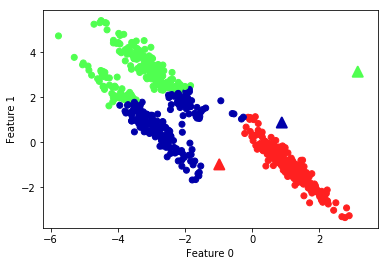

In [51]:
# 生成一些随机分组数据
X,y=make_blobs(random_state=170,n_samples=600)
rng=np.random.RandomState(74)

# 变换数据使其拉长
transformation=rng.normal(size=(2,2))
X=np.dot(X,transformation)

# 将数据聚类成3个簇
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
y_pred=kmeans.predict(X)

# 画出簇分配和簇中心
plt.scatter(X[:,0],X[:,1],c=y_pred,cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,1],marker='^',c=[0,1,2],s=100,linewidth=2,cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

如果簇的形状更加复杂，那么k均值表现也很差：

Text(0, 0.5, 'Feature 1')

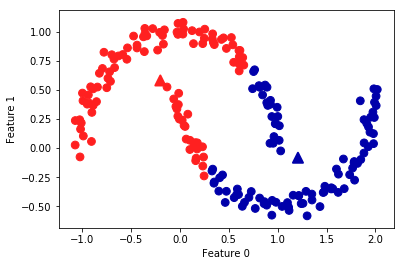

In [52]:
# 生成模拟的two_moons数据集
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=200,noise=0.05,random_state=0)

# 将数据聚类成2个簇
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
y_pred=kmeans.predict(X)

# 画出簇分配和簇中心
plt.scatter(X[:,0],X[:,1],c=y_pred,cmap=mglearn.cm2,s=60)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='^',c=[mglearn.cm2(0),mglearn.cm2(1)],s=100,linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

上图我们希望聚类算法能够发现两个半月形。但利用k均值算法是不可能做到这一点的。

# 矢量量化，或者将k均值看作分解
虽然k均值是一种聚类算法，但在k均值和分解方法（比如PCA和NMF）之间存在一些有趣的共同之处。PCA试图找到数据中方差最大的方向，而NMF试图找到累加的分量，这通常对应与数据的“极值”和“部分”。两种方法都试图将数据点表示为一些分量之和。与此相反，k均值则尝试利用簇中心来表示每个数据点。你可以将其看作仅用一个分量来表示每个数据点，该分量由簇中心给出。这种观点将k均值看作是一种分解方法，其中每个点利用单一分量来表示，这种观点被称为矢量化（vector quantization）。  
我们来并排比较PCA、NMF和k均值，分别显示提取的分量，以及利用100个分量对数据集中人脸的重建。对于k均值，重建就是在训练集中找到的最近的簇中心：

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X_people,y_people,stratify=y_people,random_state=0)
nmf=NMF(n_components=100,random_state=0)
nmf.fit(X_train)
pca=PCA(n_components=100,random_state=0)
pca.fit(X_train)
kmeans=KMeans(n_clusters=100,random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca=pca.inverse_transform(pca.transform(X_test))
X_reconstructed_nmf=np.dot(nmf.transform(X_test),nmf.components_)
X_reconstructed_kmeans=kmeans.cluster_centers_[kmeans.predict(X_test)]

Text(0, 0.5, 'nmf')

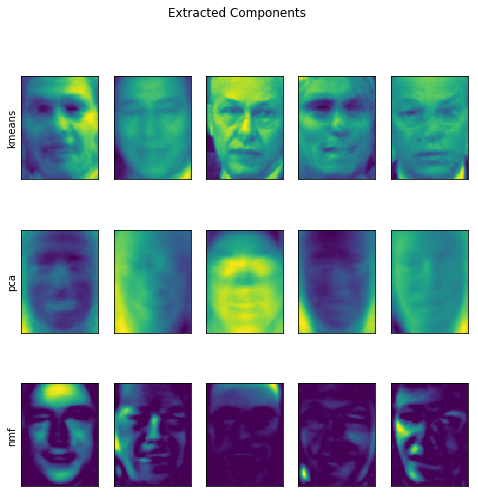

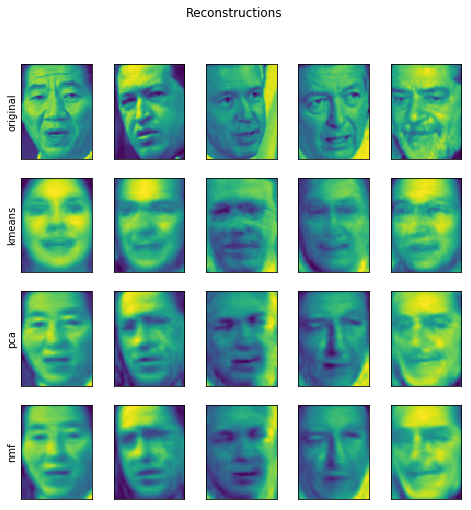

In [54]:
fig,axes=plt.subplots(3,5,figsize=(8,8),subplot_kw={'xticks':(),'yticks':()})
fig.suptitle("Extracted Components")
for ax,comp_kmeans,comp_pca,comp_nmf in zip(axes.T,kmeans.cluster_centers_,pca.components_,nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape),cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0,0].set_ylabel("kmeans")
axes[1,0].set_ylabel("pca")
axes[2,0].set_ylabel("nmf")

fig,axes=plt.subplots(4,5,figsize=(8,8),subplot_kw={'xticks':(),'yticks':()})
fig.suptitle("Reconstructions")
for ax,orig,rec_kmeans,rec_pca,rec_nmf in  zip(axes.T,X_test,X_reconstructed_kmeans,X_reconstructed_pca,X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    
axes[0,0].set_ylabel("original")
axes[1,0].set_ylabel("kmeans")
axes[2,0].set_ylabel("pca")
axes[3,0].set_ylabel("nmf")

利用k均值做矢量量化的一个有趣之处在于，可以用比输入维度更多的簇来对数据进行编码。对于two_moons数据，使用PCA或NMF,我们对这个数据无能为力，因为它只有两个维度。使用PCA或NMF将其降到一维，将会完全破坏数据的结构。但通过使用更多的簇中心，我们可以用k均值找到一种更具表现力的表示：

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


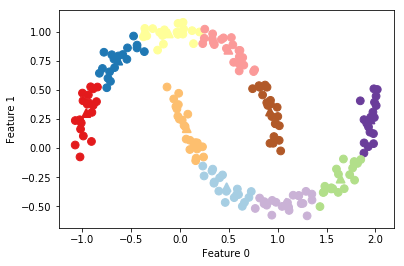

In [55]:
X,y=make_moons(n_samples=200,noise=0.05,random_state=0)

kmeans=KMeans(n_clusters=10,random_state=0)
kmeans.fit(X)
y_pred=kmeans.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_pred,s=60,cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=60,marker='^',c=range(kmeans.n_clusters),linewidth=2,cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

我们使用了10个簇中心，也就是说，现在每个点都被分配了0到9之间的一个数字。我们可以将其看作是10个分量表示的数据（我们有10个新特征），只有表示该店对应的簇中心那个特征不为0，其他特征均为0.利用这个10维表示，现在可以用线性模型来划分两个半月形，而利用原始的两个特征是不可能做到这一点。将到每个簇中心的距离作为特征，还可以得到一种表现力更强的数据表示。可以利用kmeans的transform方法来完成这一点：

In [56]:
distance_features=kmeans.transform(X)
print("Distance feature shape:{}".format(distance_features.shape))
print("Distance features:{}".format(distance_features))

Distance feature shape:(200, 10)
Distance features:[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


k均值是非常流行的聚类算法，因为它不仅相对容易理解和实现，而且运行速度也相对较快。k均值可以轻松扩展到大型数据集，scikit-learn甚至在MiniBatchMeans类中包含了一种更具可扩展性的变体，可以处理非常大的数据集。  
k均值的缺点之一在于，它依赖于随机初始化，也就是说，算法的输出依赖于随机种子。默认情况下，scikit-learn用10种不同的随机初始化将算法运行10次，并返回最佳结果。k均值还有一个缺点，就是对簇形状的假设的约束性较强，而且还要求指定所要寻找的簇的个数 （在现实世界的应用中可能并不知道这个数字）。

# 凝聚聚类
凝聚聚类（agglomerative clustering）指的是许多基于相同原则构建的聚类算法，这一原则是：算法首先声明每个点是自己的簇，然后合并两个最相似的簇，直到满足某种停止准则为止。scikit-learn中实现的停止准则是簇的个数，因此相似的簇被合并，直到仅剩下指定个数的簇。还有一些链接(linkage)准则，规定如何度量“最相似的簇”。这种度量总是定义在两个现有的簇之间。  
scikit-learn中实现了以下三种选项。  
ward:默认选项。ward挑选两个簇来合并，使得所有簇中方差增加最小。这通常会得到大小差不多相等的簇。
avearge:average链接将簇中所有点之间平均距离最小的两个簇合并。  
complete:complete链接（也称为最大链接）将簇中点之间最大距离最小的两个簇合并。  

ward适用于大多数数据集。如果簇中的成员个数非常不同（比如其中一个比其他所有都大得多），那么average或complete可能效果更好。

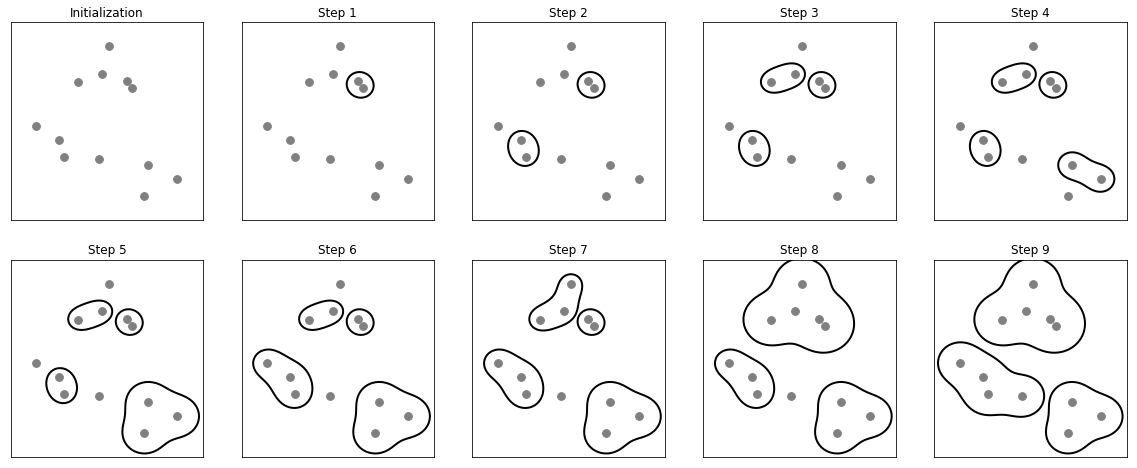

In [57]:
mglearn.plots.plot_agglomerative_algorithm()

我们来看一下凝聚聚类对上面的三簇数据的效果如何。由于算法的工作原理，凝聚聚类不能对新数据点做出预测。因此AgglomerativeClustering没有predict方法。为了构造模型并得到训练集上簇的成员关系。可以改用fit_predict方法，结果如下：

Text(0, 0.5, 'Feature 1')

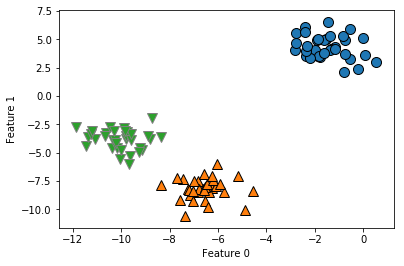

In [58]:
from sklearn.cluster import AgglomerativeClustering
X,y=make_blobs(random_state=1)

agg=AgglomerativeClustering(n_clusters=3)
assignment=agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0],X[:,1],assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

凝聚聚类算法完美地完成了聚类。虽然凝聚聚类的sikit-learn实现需要你指定希望算法找到的簇的个数，但凝聚聚类方法为选择正确的个数提供了一些帮助。

# 层次聚类与树状图
凝聚聚类生成了所谓的层次聚类（hierachical clustering）。聚类过程迭代进行，每个点从一个单点簇变为属于最终的某个簇。每个中间步骤都提供了数据的一种聚类（簇的个数也不相同）。有时候，同时查看所有可能的聚类是有帮助的。如下的例子叠加显示了所有可能的聚类，主要有助于深入了解每个簇如何分解为较小的簇：

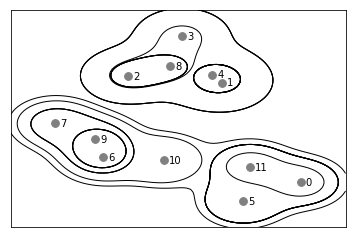

In [59]:
mglearn.plots.plot_agglomerative()

虽然这种可视化为层次聚类提供了非常详细地视图，但它依赖于数据的二维性质，因此不能用于具有两个以上特征的数据集。但还有另一个将层次聚类可视化的工具，叫作树状图（dendrogram）,它可以处理多维数据集。  
借助Scipy可以绘制树状图：

Text(0, 0.5, 'Cluster distance')

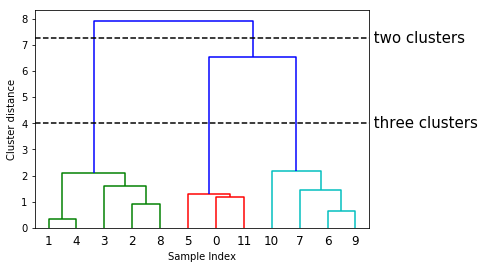

In [60]:
from scipy.cluster.hierarchy import dendrogram,ward

X,y=make_blobs(random_state=0,n_samples=12)
# 将ward聚类应用于数据数组X
# Scipy的ward函数返回一个数组，指定执行凝聚聚类时跨越的距离
linkage_array=ward(X)
# 现在为包含簇之间距离的linkage_array绘制树状图
dendrogram(linkage_array)

# 在树中标记划分成两个簇或三个簇的位置
ax=plt.gca()
bounds=ax.get_xbound()
ax.plot(bounds,[7.25,7.25],'--',c='k')
ax.plot(bounds,[4,4],'--',c='k')

ax.text(bounds[1],7.25,' two clusters',va='center',fontdict={'size':15})
ax.text(bounds[1],4,' three clusters',va='center',fontdict={'size':15})
plt.xlabel("Sample Index")
plt.ylabel("Cluster distance")

# DBSCAN
DBSCAN(density-based spatial clustering of applications with noise,即“具有噪声的基于密度的空间聚类应用”）。DBSCAN的主要优点是它不需要用户先验地设置簇的个数，可以划分具有复杂形状的簇，还可以找出不属于任何簇的点。DBSCAN比凝聚聚类和k均值稍慢，但仍可以扩展到相对较大的数据集。  
DBSCAN的原理是识别特征空间的“拥挤”区域中的点，在这些区域中许多数据点靠近在一起。这些区域被称为特征空间中的密集（dense）区域。DBSCAN背后的思想是，簇形成数据的密集区域，并由相对较空的区域隔开。  
在密集区域内的点被称为核心样本（core sample,或核心点），它们的定义如下。DBSCAN有两个参数：min_samples和eps。如果在距一个给定数据点eps的距离内至少有min_samples个数据点，那么这个数据点就是核心样本。DBSCAN将彼此距离小于eps的核心样本放到同一个簇中。  
我们将DBSCAN应用于演示凝聚聚类的模拟数据集。与凝聚聚类类似，DBSCAN也不允许对新的测试数据进行预测，所以我们将使用fit_predict方法来执行聚类并返回簇标签。 


In [61]:
from sklearn.cluster import DBSCAN
X,y=make_blobs(random_state=0,n_samples=12)

dbscan=DBSCAN()
clusters=dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


所有数据点都被分配了标签-1，这代表噪声。这是eps和min_samples默认参数设置的结果，对于小型的玩具数据集并没有调节这些参数。min_samples和eps取不同值时的簇分类如下所示，其可视化结果如下图：

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


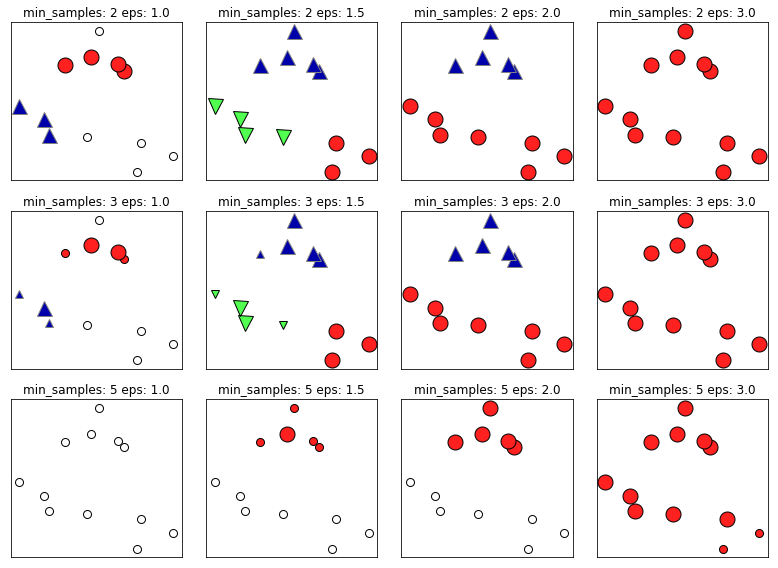

In [62]:
mglearn.plots.plot_dbscan()

在上述图中，属于簇的点是实心的，而噪声点则显示为空心的。核心样本显示为较大的标记，而边界点则显示为较小的标记。增大eps（在图中从左到右），更多的点会被包含在一个簇中。这让簇变大，但可能也会导致多个簇合并成一个。增大min_samples（在图中从上到下），核心点会变的更少，更多的点被标记为噪声。  
参数eps在某种程度上更加重要，因为它决定了点与点之间“接近”的含义。将eps设置得非常小，意味着没有点是核心样本，可能会导致所有点都被标记为噪声。将eps设置得非常大，可能会导致所有点形成单个簇。
设置min_samples主要是为了判断稀疏区域内的点被标记为异常值还是形成自己的簇。如果增大min_samples，任何一个包含少于min_samples个样本的簇现在将被标记为噪声。因此，min_samples决定簇的最小尺寸。在上图中eps=1.5时，从min_samples=3到min_samples=5,可以清楚地看到这一点。min_samples=3时有三个簇：一个包含4个点，一个包含5个点，一个包含3个点。min_samples=5时，两个较小的簇（分别包含3个点和4个点）现在都被标记为噪声，只保留包含5个样本的簇。  
虽然DBSCAN不需要显示地设置簇的个数，但设置eps可以隐式地控制找到的簇的个数。使用StandardScaler或MinMaxScaler对数据进行缩放之后，有时会更容易找到eps的较好取值，因为使用这些缩放技术将确保所有特征具有相似的范围。  
下面将展示在two_moons数据集上运行DBSCAN的结果。利用默认设置，算法找到了两个半圆形并将其分开：

Text(0, 0.5, 'Feature ')

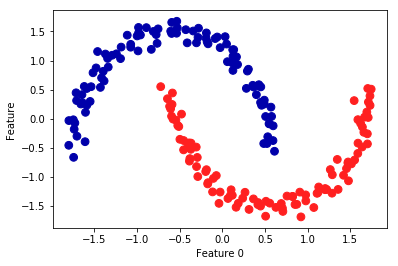

In [63]:
X,y=make_moons(n_samples=200,noise=0.05,random_state=0)

# 将数据缩放承平均值为0，方差为1
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

dbscan=DBSCAN()
clusters=dbscan.fit_predict(X_scaled)
# 绘制簇分配
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn.cm2,s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature ")

由于算法找到了我们想要的簇的个数（2个），因此参数设置的效果似乎很好。如果将eps减小到0.2（默认值为0.5），我们将会得到8个簇，这显然太多了。将eps增大到0.7则会导致只有一个簇。  
在使用DBSCAN时，你需要谨慎处理返回的簇分配，如果使用簇标签对另一个数据进行索引，那么使用-1表示噪声可能会产生意料之外的结果。

# 聚类算法的对比与评估
在应用聚类算法时，其挑战之一就是很难评估一个算法的效果好坏，也很难比较不同算法的结果。在讨论完k均值、凝聚聚类和DBSCAN背后的算法之后，下面我们将在一些现实世界的数据集上比较它们。

# 1.用真实值评估聚类
有一些指标可用于评估聚类算法相对于真实聚类的结果，其中最重要的是**调整rand指数（adjusted rand index,ARI）**和**归一化互信息（normalized mutual information,NMI）**,二者都给出了定量的度量，其最佳值为1,0表示不相关的聚类（虽然ARI可以去负值）。  
下面我们使用ARI来比较k均值，凝聚聚类和DBSCAN算法。为了对比，我们还添加了将点随机分配到两个簇中的图像：

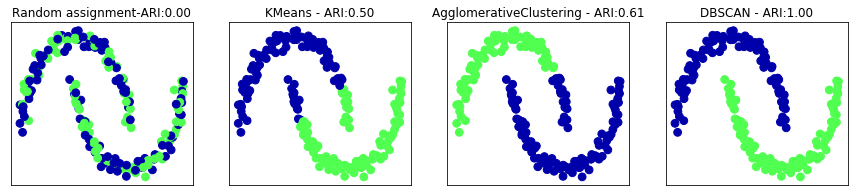

In [64]:
from sklearn.metrics.cluster import adjusted_rand_score
X,y=make_moons(n_samples=200,noise=0.05,random_state=0)

# 将数据缩放成平均值为0，方差为1
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

fig,axes=plt.subplots(1,4,figsize=(15,3),subplot_kw={'xticks':(),'yticks':()})

# 列出要使用的算法
algorithms=[KMeans(n_clusters=2),AgglomerativeClustering(n_clusters=2),DBSCAN()]

# 创建一个随机的簇分配，作为参考
random_state=np.random.RandomState(seed=0)
random_clusters=random_state.randint(low=0,high=2,size=len(X))

# 绘制随机分配
axes[0].scatter(X_scaled[:,0],X_scaled[:,1],c=random_clusters,cmap=mglearn.cm3,s=60)
axes[0].set_title("Random assignment-ARI:{:.2f}".format(adjusted_rand_score(y,random_clusters)))

for ax,algorithm in zip(axes[1:],algorithms):
    # 绘制簇分配和簇中心
    clusters=algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn.cm3,s=60)
    ax.set_title("{} - ARI:{:.2f}".format(algorithm.__class__.__name__,adjusted_rand_score(y,clusters)))

调整rand指数给出了符合直觉的结果，随机簇分配的分数为0，而DBSCAN（完美地找到了期望中的聚类）的分数为1。  
用这种方式评估聚类时，一个常见的错误是使用accuracy_score而不是adjusted_rand_score、normalized_mutual_info_score或其他聚类指标。使用精度的问题在于，它要求分配的簇标签与真实值完全匹配。但簇标签本身毫无意义——唯一重要的是哪些点位于同一个簇中。

In [65]:
from sklearn.metrics import accuracy_score

# 这两种点标签对应于相同的聚类
clusters1=[0,0,1,1,0]
clusters2=[1,1,0,0,1]
# 精度为0，因为二者标签完全不同
print("Accuracy:{:.2f}".format(accuracy_score(clusters1,clusters2)))
# 调整rand分数为1，因为二者聚类完全相同
print("ARI:{:.2f}".format(adjusted_rand_score(clusters1,clusters2)))

Accuracy:0.00
ARI:1.00


# 2.在没有真实值的情况下评估聚类
在实践中，通常没有真实值来比较结果。如果我们知道了数据的正确聚类，那么可以使用这一信息构建一个监督模型（比如分类器）。因此，使用类似ARI和NMI的指标通常仅有助于开发算法，但对评估应用是否成功没有帮助。  
在一些聚类的评分指标不需要真实值，比如轮廓系数（silhouette coeffient）。但它们在实践中的效果并不好。轮廓分数计算一个簇的紧致度，其值越大越好，最高分数为1。虽然紧致的簇很好，但紧致度不允许复杂的形状。  
下面是一个例子，利用轮廓分数在two_moons数据集上比较k均值、凝聚聚类和DBSCAN：

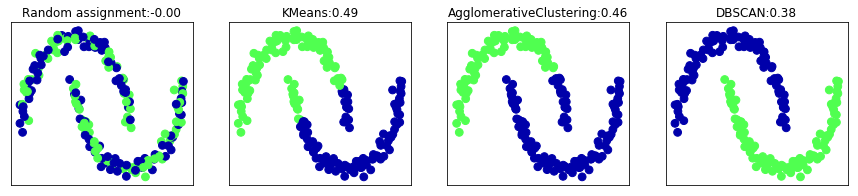

In [66]:
from sklearn.metrics.cluster import silhouette_score

X,y=make_moons(n_samples=200,noise=0.05,random_state=0)
# 将数据缩放成平均值为0、方差为1
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
fig,axes=plt.subplots(1,4,figsize=(15,3),subplot_kw={'xticks':(),'yticks':()})

# 创建一个随机的簇分配，作为参考
random_state=np.random.RandomState(seed=0)
random_clusters=random_state.randint(low=0,high=2,size=len(X))

# 绘制随机分配
axes[0].scatter(X_scaled[:,0],X_scaled[:,1],c=random_clusters,cmap=mglearn.cm3,s=60)
axes[0].set_title("Random assignment:{:.2f}".format(silhouette_score(X_scaled,random_clusters)))

algorithms=[KMeans(n_clusters=2),AgglomerativeClustering(n_clusters=2),DBSCAN()]

for ax,algorithm in zip(axes[1:],algorithms):
    clusters=algorithm.fit_predict(X_scaled)
    # 绘制簇分配和簇中心
    ax.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn.cm3,s=60)
    ax.set_title("{}:{:.2f}".format(algorithm.__class__.__name__,silhouette_score(X_scaled,clusters)))

如上图所示，k均值的轮廓分数最高，尽管我们可能更喜欢DBSCAN的结果。对于评估聚类，稍好的策略是使用基于鲁棒性的（robustness-based）聚类指标，并对结果进行比较。其思想是，如果许多算法和许多数据扰动返回相同的结果，那么它很可能是可信的。不幸的是，sickit-learn还没有实现这一策略。

在实践中，即使我们得到一个鲁棒性很好的聚类或非常高的轮廓分数，但仍然不知道聚类中是否有任何语义含义，或者聚类是否反映了数据中我们感兴趣的某个方面。要想知道聚类是否对应于我们感兴趣的内容，唯一的办法就是对簇进行人工分析。  


# 3.在人脸数据集上比较算法
我们将k均值、DBSCAN和凝聚聚类算法应用于Wild数据集中的Labeled Faces,并查看他们是否找到了有趣的结构。我们将使用数据的特征脸表示，它由包含100个成分的PCA(whiten=True)生成：

In [67]:
# 从lfw数据中提取特征脸，并对数据进行变换
from sklearn.decomposition import PCA
pca=PCA(n_components=100,whiten=True,random_state=0)
pca.fit_transform(X_people)
X_pca=pca.transform(X_people)

用DBSCAN分析人脸数据集，看能否找到类似的簇：

In [68]:
dbscan=DBSCAN()
labels=dbscan.fit_predict(X_pca)
print("Unique labels:{}".format(np.unique(labels)))

Unique labels:[-1]


所有返回的标签都是-1，因此所有数据都被DBSCAN标记为“噪声”。我们可以改变两个参数来改进这一点：第一，我们可以增大eps,从而扩展每个点的领域；第二，我们可以减小min_samples，从而将更小的点组视为簇。我们先尝试改变min_samples:

In [69]:
dbscan=DBSCAN(min_samples=3)
labels=dbscan.fit_predict(X_pca)
print("Unique labels:{}".format(np.unique(labels)))

Unique labels:[-1]


即使仅考虑由三个点构成的组，所有点也被标记为噪声。因此我们需要增大eps:

In [70]:
dbscan=DBSCAN(min_samples=3,eps=15)
labels=dbscan.fit_predict(X_pca)
print("Unique labels:{}".format(np.unique(labels)))

Unique labels:[-1  0]


使用更大的eps（其值为15），我们只得到了单一簇和噪声点。我们可以利用这一结果找出“噪声”相对于其他数据的形状。为了进一步理解发生的事情，我们查看有多少点是噪声，有多少点在簇内：

In [72]:
# 计算所有簇中的点数和噪声中的的点数。
# bincount不允许负值，所以我们需要加1
# 结果中第一个数字对应于噪声点。
print("Number of points per cluster:{}".format(np.bincount(labels+1)))

Number of points per cluster:[  30 1598]


噪声点非常少——只有27个，因此我们可以查看所有的噪声点：

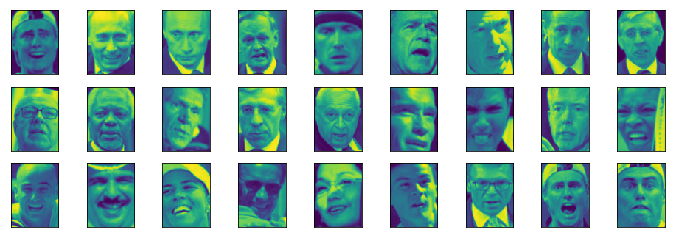

In [73]:
noise=X_people[labels==-1]

fig,axes=plt.subplots(3,9,subplot_kw={'xticks':(),'yticks':()},figsize=(12,4))

for image,ax in zip(noise,axes.ravel()):
    ax.imshow(image.reshape(image_shape),vmin=0,vmax=1)

观察这些图像不难发现，这些图像都包含奇怪的角度，或者太近或太宽的剪切等。